In [1]:
import pandas as pd
import numpy as np

# Manually creating the DataFrame based on the image data
data = {
    "SN": [170428, 180166, 180561, 190230, 190260, 300105, 310025, 310042, 310073, 310091, 310161, 310238, 310574, 320258, 330022],
    "Subsample": ["PS1"] * 15,
    "z": [0.3001, 0.1476, 0.2288, 0.1388, 0.1436, 0.0919, 0.1568, 0.2388, 0.1496, 0.5078, 0.2528, 0.2284, 0.2368, 0.3412, 0.2641],
    "mb": [21.81, 19.90, 21.43, 19.81, 19.58, 19.17, 19.72, 20.88, 19.69, 22.73, 21.85, 21.17, 21.00, 21.88, 21.24],
    "x1": [-0.99, 0.60, 0.01, -1.41, 0.98, 0.33, 1.85, 1.28, 0.38, -0.25, -0.44, -0.29, -0.62, -1.86, -1.25],
    "c": [-0.01, 0.04, 0.14, -0.07, -0.04, -0.08, -0.07, -0.05, 0.19, -0.09, -0.07, 0.02, 0.02, -0.06, 0.02],
    "μCorr": [-0.07, -0.02, -0.04, -0.01, -0.04, 0.08, 0.05, -0.03, 0.09, -0.08, -0.06, -0.09, -0.08, -0.01, -0.06],
    "Mass": [9.11, 10.88, 8.44, 10.87, 10.83, 9.87, 10.09, 11.64, 9.31, 9.07, 9.58, 9.31, 10.23, 10.05, 10.98]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print the DataFrame to verify
print(df)

# Assuming the covariance matrix Sigma is identity for simplicity (you'll need the actual one)
Sigma = np.identity(df.shape[1] - 2)  # Size excluding SN and Subsample columns
mu = df[["z", "mb", "x1", "c", "μCorr", "Mass"]].mean().values

# Now, let's apply the likelihood function on the data
def log_likelihood(d, mu, Sigma):
    # Ensure inputs are numpy arrays
    d = np.array(d)
    mu = np.array(mu)
    Sigma = np.array(Sigma)
    
    # Compute the inverse of the covariance matrix
    Sigma_inv = np.linalg.inv(Sigma)
    
    # Compute the first term: -(1/2) * (d - mu)^T * Sigma_inv * (d - mu)
    diff = d - mu
    term1 = -0.5 * np.dot(np.dot(diff.T, Sigma_inv), diff)
    
    # Compute the second term: (1/2) * [(1^T * Sigma_inv * (d - mu))^2 / (1^T * Sigma_inv * 1)]
    ones = np.ones(len(d))
    Sigma_inv_ones = np.dot(Sigma_inv, ones)
    numerator = np.dot(ones.T, np.dot(Sigma_inv, diff)) ** 2
    denominator = np.dot(ones.T, Sigma_inv_ones)
    term2 = 0.5 * (numerator / denominator)
    
    # Compute the log-likelihood
    log_likelihood = term1 + term2
    
    return log_likelihood

# Apply log_likelihood for each row in the DataFrame
df["log_likelihood"] = df.apply(lambda row: log_likelihood(row[["z", "mb", "x1", "c", "μCorr", "Mass"]].values, mu, Sigma), axis=1)

# Print the DataFrame with log-likelihoods
print(df[["SN", "log_likelihood"]])


        SN Subsample       z     mb    x1     c  μCorr   Mass
0   170428       PS1  0.3001  21.81 -0.99 -0.01  -0.07   9.11
1   180166       PS1  0.1476  19.90  0.60  0.04  -0.02  10.88
2   180561       PS1  0.2288  21.43  0.01  0.14  -0.04   8.44
3   190230       PS1  0.1388  19.81 -1.41 -0.07  -0.01  10.87
4   190260       PS1  0.1436  19.58  0.98 -0.04  -0.04  10.83
5   300105       PS1  0.0919  19.17  0.33 -0.08   0.08   9.87
6   310025       PS1  0.1568  19.72  1.85 -0.07   0.05  10.09
7   310042       PS1  0.2388  20.88  1.28 -0.05  -0.03  11.64
8   310073       PS1  0.1496  19.69  0.38  0.19   0.09   9.31
9   310091       PS1  0.5078  22.73 -0.25 -0.09  -0.08   9.07
10  310161       PS1  0.2528  21.85 -0.44 -0.07  -0.06   9.58
11  310238       PS1  0.2284  21.17 -0.29  0.02  -0.09   9.31
12  310574       PS1  0.2368  21.00 -0.62  0.02  -0.08  10.23
13  320258       PS1  0.3412  21.88 -1.86 -0.06  -0.01  10.05
14  330022       PS1  0.2641  21.24 -1.25  0.02  -0.06  10.98
        

100%|██████████| 5000/5000 [00:04<00:00, 1119.16it/s]


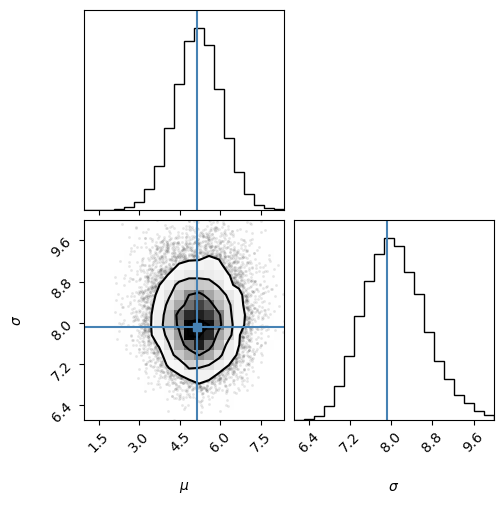

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee

# Assuming the data DataFrame from previous steps
data = {
    "SN": [170428, 180166, 180561, 190230, 190260, 300105, 310025, 310042, 310073, 310091, 310161, 310238, 310574, 320258, 330022],
    "Subsample": ["PS1"] * 15,
    "z": [0.3001, 0.1476, 0.2288, 0.1388, 0.1436, 0.0919, 0.1568, 0.2388, 0.1496, 0.5078, 0.2528, 0.2284, 0.2368, 0.3412, 0.2641],
    "mb": [21.81, 19.90, 21.43, 19.81, 19.58, 19.17, 19.72, 20.88, 19.69, 22.73, 21.85, 21.17, 21.00, 21.88, 21.24],
    "x1": [-0.99, 0.60, 0.01, -1.41, 0.98, 0.33, 1.85, 1.28, 0.38, -0.25, -0.44, -0.29, -0.62, -1.86, -1.25],
    "c": [-0.01, 0.04, 0.14, -0.07, -0.04, -0.08, -0.07, -0.05, 0.19, -0.09, -0.07, 0.02, 0.02, -0.06, 0.02],
    "μCorr": [-0.07, -0.02, -0.04, -0.01, -0.04, 0.08, 0.05, -0.03, 0.09, -0.08, -0.06, -0.09, -0.08, -0.01, -0.06],
    "Mass": [9.11, 10.88, 8.44, 10.87, 10.83, 9.87, 10.09, 11.64, 9.31, 9.07, 9.58, 9.31, 10.23, 10.05, 10.98]
}

df = pd.DataFrame(data)

# Extract the parameters we want to plot
params = df[["z", "mb", "x1", "c", "μCorr", "Mass"]].values

# Define the log-likelihood function (simple normal likelihood for demonstration)
def log_likelihood(theta, params):
    mu, sigma = theta
    return -0.5 * np.sum(((params - mu) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))

# Define the prior (uniform for simplicity)
def log_prior(theta):
    mu, sigma = theta
    if 0 < sigma < 10:
        return 0.0
    return -np.inf

# Define the posterior probability
def log_probability(theta, params):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, params)

# Initialize the MCMC sampler
nwalkers, ndim = 50, 2  # 50 walkers, 2 parameters (mu, sigma)
initial = np.array([params.mean(), params.std()])
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(params,))

# Run the MCMC chain
sampler.run_mcmc(pos, 5000, progress=True);

# Get the samples and create the corner plot
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Create the corner plot
figure = corner.corner(samples, labels=["$\\mu$", "$\\sigma$"], truths=[params.mean(), params.std()])
plt.show()


  0%|          | 0/5000 [00:00<?, ?it/s]/home/andrewcats/anaconda3/envs/acc-env/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:03<00:00, 1577.65it/s]


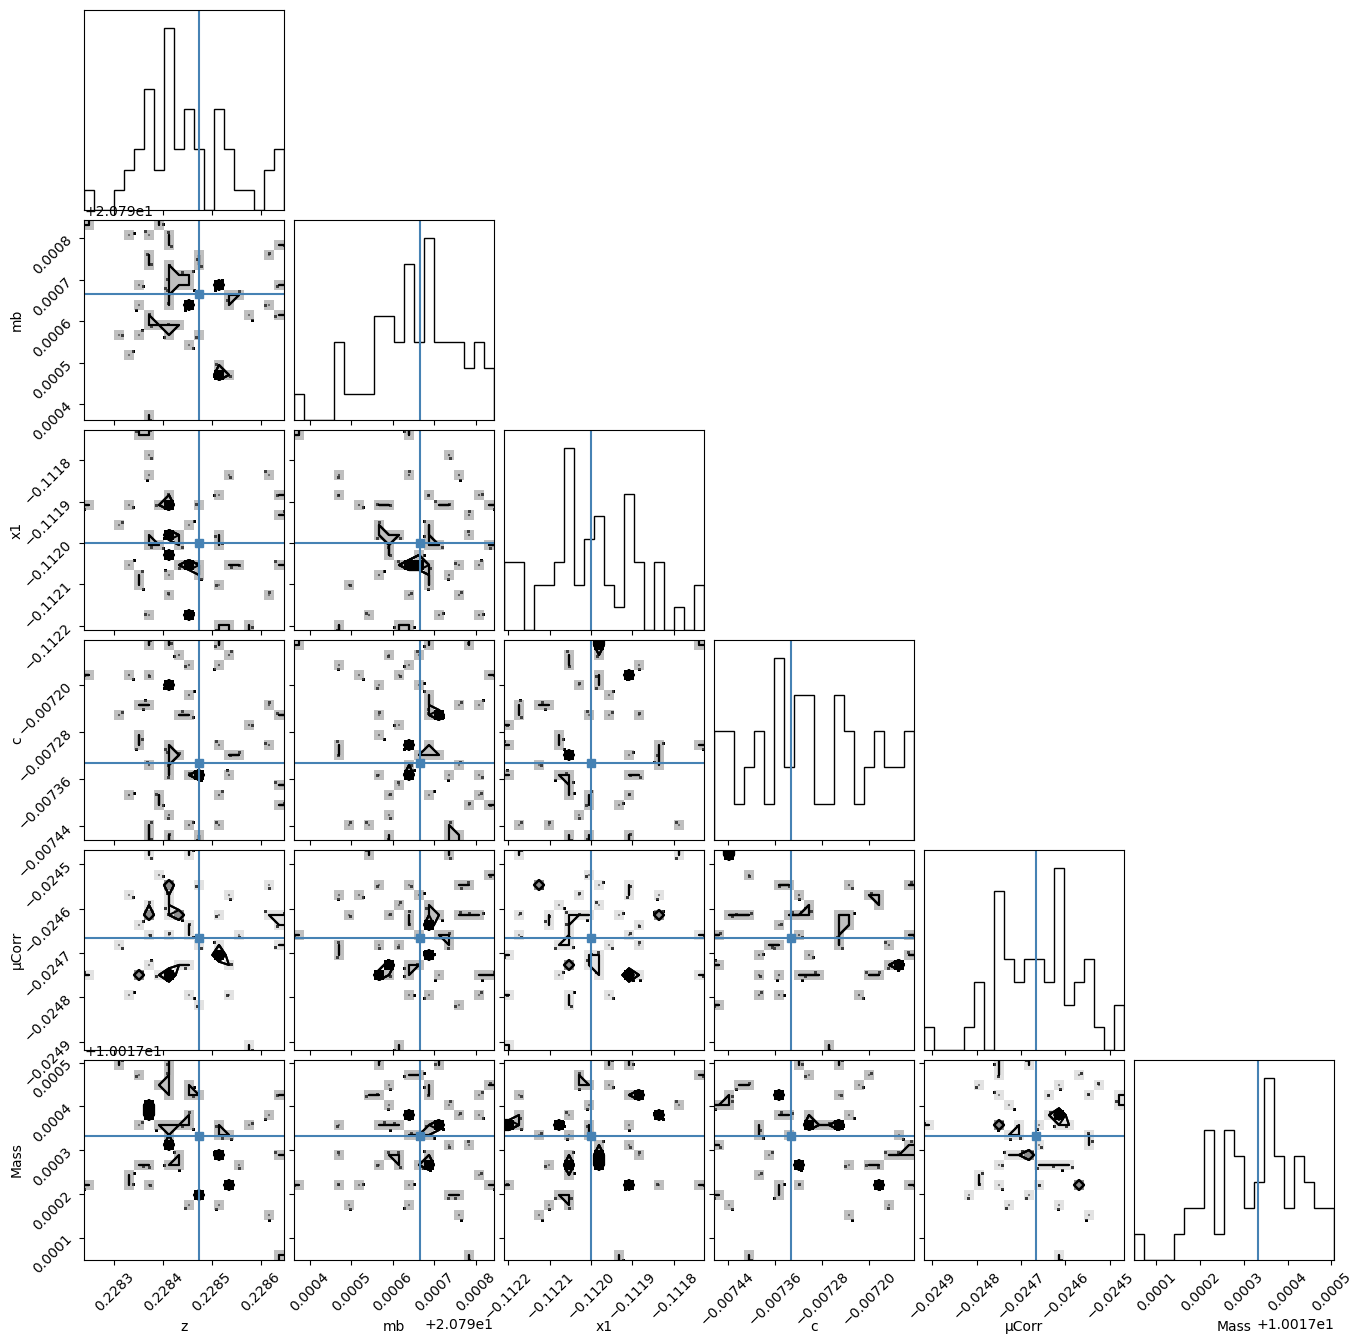

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Define the dataset
data = {
    "SN": [170428, 180166, 180561, 190230, 190260, 300105, 310025, 310042, 310073, 310091, 310161, 310238, 310574, 320258, 330022],
    "Subsample": ["PS1"] * 15,
    "z": [0.3001, 0.1476, 0.2288, 0.1388, 0.1436, 0.0919, 0.1568, 0.2388, 0.1496, 0.5078, 0.2528, 0.2284, 0.2368, 0.3412, 0.2641],
    "mb": [21.81, 19.90, 21.43, 19.81, 19.58, 19.17, 19.72, 20.88, 19.69, 22.73, 21.85, 21.17, 21.00, 21.88, 21.24],
    "x1": [-0.99, 0.60, 0.01, -1.41, 0.98, 0.33, 1.85, 1.28, 0.38, -0.25, -0.44, -0.29, -0.62, -1.86, -1.25],
    "c": [-0.01, 0.04, 0.14, -0.07, -0.04, -0.08, -0.07, -0.05, 0.19, -0.09, -0.07, 0.02, 0.02, -0.06, 0.02],
    "μCorr": [-0.07, -0.02, -0.04, -0.01, -0.04, 0.08, 0.05, -0.03, 0.09, -0.08, -0.06, -0.09, -0.08, -0.01, -0.06],
    "Mass": [9.11, 10.88, 8.44, 10.87, 10.83, 9.87, 10.09, 11.64, 9.31, 9.07, 9.58, 9.31, 10.23, 10.05, 10.98]
}

df = pd.DataFrame(data)

# Extract the parameters we want to plot
params = df[["z", "mb", "x1", "c", "μCorr", "Mass"]].values 

# Define the log-likelihood function using the given formula

def log_likelihood(theta, params, Sigma_inv):
    mu = theta
    ones = np.ones(params.shape[0])
    
    diff = params - mu
    term1 = -0.5 * np.dot(np.dot(diff.T, Sigma_inv), diff)
    
    Sigma_inv_ones = np.dot(Sigma_inv, ones)
    numerator = np.dot(ones.T, np.dot(Sigma_inv, diff)) ** 2
    denominator = np.dot(ones.T, Sigma_inv_ones)
    term2 = 0.5 * (numerator / denominator)
    
    return term1 + term2

# Define the prior (assuming a uniform prior for simplicity)
def log_prior(theta):
    if np.all(theta > 0) and np.all(theta < 100):
        return 0.0
    return -np.inf

# Define the posterior probability
def log_probability(theta, params, Sigma_inv):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, params, Sigma_inv)

# Covariance matrix and its inverse (assuming identity for simplicity, replace with actual covariance matrix)
Sigma = np.identity(params.shape[1])
Sigma_inv = np.linalg.inv(Sigma)

# Initialize the MCMC sampler
nwalkers, ndim = 50, params.shape[1]
initial = params.mean(axis=0)
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(params, Sigma_inv))

# Run the MCMC chain
sampler.run_mcmc(pos, 5000, progress=True)

# Get the samples and create the corner plot
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Create the corner plot
figure = corner.corner(samples, labels=["z", "mb", "x1", "c", "μCorr", "Mass"], truths=params.mean(axis=0))
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Define the dataset

# Read the data from the file
file_path = './lcparam_full_long.txt'
df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color', 'dcolor', '3rdvar', 'd3rdvar', 'cov_m_s', 'cov_m_c', 'cov_s_c', 'set', 'ra', 'dec', 'biascor'])
#in this file I don't put the supernovae with strange names (last supernovae)


'''
x1: SALT2 light curve stretch parameter.
c: SALT2 light curve color parameter.
mb: SALT2 light curve peak magnitude in B band.
μCorr: Corrected distance modulus. (I DON'T BELIEVE IT)
Mass: Host galaxy stellar mass.
zcmb: CMB frame redshift.
zhel: Heliocentric redshift.
'''

# Extract the parameters we want to plot
params = df[["zcmb", "mb", "x1", "color"]].values #.values converts the name of the columns to a numpy array

# Define the log-likelihood function using the given formula
#Explanation of the likelihood:
'''
d is the data vector--> params (in the following function)
mu is the mean vector--> theta (in the following function)
sigma_inv is the inverse of the covariance matrix
'''
def log_likelihood(theta, params, Sigma_inv):
    mu = theta
    ones = np.ones(params.shape[0])
    
    diff = params - mu
    term1 = -0.5 * np.dot(np.dot(diff.T, Sigma_inv), diff)
    
    Sigma_inv_ones = np.dot(Sigma_inv, ones)
    numerator = np.dot(ones.T, np.dot(Sigma_inv, diff)) ** 2
    denominator = np.dot(ones.T, Sigma_inv_ones)
    term2 = 0.5 * (numerator / denominator)
    
    return term1 + term2

# Define the prior (assuming a uniform prior for simplicity)
def log_prior(theta):
    if np.all(theta > 0) and np.all(theta < 100):
        return 0.0
    return -np.inf

# Define the posterior probability
#This is used to estimate the posterior distribution of the parameters given the data.
def log_probability(theta, params, Sigma_inv):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, params, Sigma_inv)

# Covariance matrix and its inverse (assuming identity for simplicity, replace with actual covariance matrix)
Sigma = np.identity(params.shape[1]) #I believe that I must not use identity but I must the error of mb
Sigma_inv = np.linalg.inv(Sigma)

# Initialize the MCMC sampler
nwalkers, ndim = 50, params.shape[1]
initial = params.mean(axis=0)
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(params, Sigma_inv))

# Run the MCMC chain
sampler.run_mcmc(pos, 5000, progress=True)

# Get the samples and create the corner plot
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Create the corner plot
figure = corner.corner(samples, labels=["z", "mb", "x1", "c", "μCorr", "Mass"], truths=params.mean(axis=0))
plt.show()


/tmp/ipykernel_8872/1924495522.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color', 'dcolor', '3rdvar', 'd3rdvar', 'cov_m_s', 'cov_m_c', 'cov_s_c', 'set', 'ra', 'dec', 'biascor'])


ValueError: operands could not be broadcast together with shapes (4,) (50,1022) 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Read the data from the file
file_path = './lcparam_full_long.txt'
df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None,
                 names=['name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
                        'dcolor', '3rdvar', 'd3rdvar', 'cov_m_s', 'cov_m_c', 'cov_s_c', 'set', 'ra', 'dec', 'biascor'])

# Extract the parameters we want to plot
params = df[["zcmb", "mb", "x1", "color"]].values

# Define the log-likelihood function
def log_likelihood(theta, params, Sigma_inv):
    mu = theta
    diff = params - mu
    
    term1 = -0.5 * np.sum(np.dot(diff, Sigma_inv) * diff)  # Corrected term1
    
    ones = np.ones(params.shape[0])
    Sigma_inv_ones = np.dot(Sigma_inv, ones)
    numerator = np.dot(ones.T, np.dot(Sigma_inv, diff)) ** 2
    denominator = np.dot(ones.T, Sigma_inv_ones)
    term2 = 0.5 * (numerator / denominator)
    
    return term1 + term2

# Define the prior (assuming a uniform prior within range)
def log_prior(theta):
    if np.all(theta > 0) and np.all(theta < 100):
        return 0.0
    return -np.inf

# Define the posterior probability
def log_probability(theta, params, Sigma_inv):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, params, Sigma_inv)

# Covariance matrix and its inverse (assuming identity for simplicity, replace with actual covariance matrix)
Sigma = np.cov(params, rowvar=False)  # Replace with actual covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Initialize the MCMC sampler
nwalkers, ndim = 50, params.shape[1]
initial = params.mean(axis=0)
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(params, Sigma_inv))

# Run the MCMC chain
sampler.run_mcmc(pos, 5000, progress=True)

# Get the samples and create the corner plot
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Create the corner plot
figure = corner.corner(samples, labels=["zcmb", "mb", "x1", "color"], truths=params.mean(axis=0))
plt.show()


/tmp/ipykernel_8872/3536012785.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None,


LinAlgError: Singular matrix